### Inspiration
- https://public.tableau.com/app/profile/mateusz.karmalski/viz/F1ResultsTracker/Results

In [1]:
%pip install fastf1

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: fastf1 in c:\users\jericho\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (3.1.2)




[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Jericho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

In [52]:
session = fastf1.get_session(2024, 'Belgium', 'R')  # Session identifiers: https://theoehrly.github.io/Fast-F1-Pre-Release-Documentation/events.html#sessionidentifier
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core    

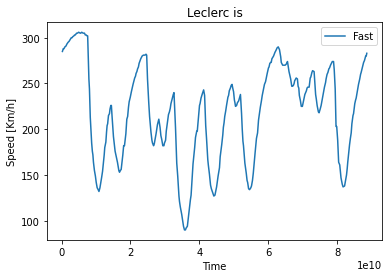

In [4]:
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

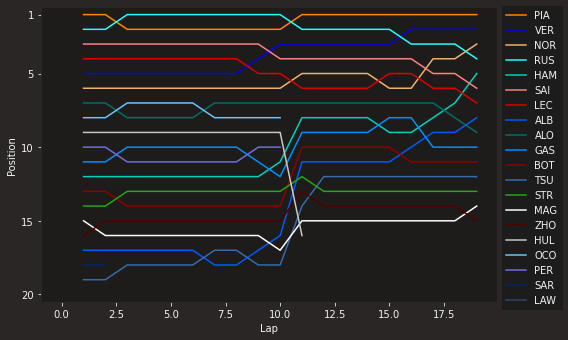

In [5]:
# Create the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
fig, ax = plt.subplots(figsize=(8.0, 4.9))

# For each driver, get their three letter abbreviation (e.g. ‘HAM’) by simply using the value of the first lap, get their color and then plot their position over the number of laps.
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)

# Finalize the plot by setting y-limits that invert the y-axis so that position one is at the top, set custom tick positions and axis labels.
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

# Because this plot is very crowed, add the legend outside the plot area.
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()


# https://docs.fastf1.dev/examples_gallery/plot_position_changes.html#sphx-glr-examples-gallery-plot-position-changes-py

In [53]:
laps = session.laps

drivers = session.drivers
print(drivers)

drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['16', '11', '44', '4', '81', '63', '55', '14', '31', '23', '1', '10', '3', '77', '18', '27', '20', '2', '24', '22']
['LEC', 'PER', 'HAM', 'NOR', 'PIA', 'RUS', 'SAI', 'ALO', 'OCO', 'ALB', 'VER', 'GAS', 'RIC', 'BOT', 'STR', 'HUL', 'MAG', 'SAR', 'ZHO', 'TSU']


In [54]:
# Extract the finishing order
results = session.results
finishing_order = results.sort_values(by='Position')['Abbreviation'].tolist()

# Sort the drivers by their finishing order
drivers_sorted = [driver for driver in finishing_order if driver in drivers]
print(drivers_sorted)

['LEC', 'PER', 'HAM', 'NOR', 'PIA', 'RUS', 'SAI', 'ALO', 'OCO', 'ALB', 'VER', 'GAS', 'RIC', 'BOT', 'STR', 'HUL', 'MAG', 'SAR', 'ZHO', 'TSU']


In [55]:
results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,,Ferrari,E80020,,Charles,Leclerc,Charles Leclerc,...,MON,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
11,11,S PEREZ,PER,,Red Bull Racing,3671C6,,Sergio,Perez,Sergio Perez,...,MEX,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
44,44,L HAMILTON,HAM,,Mercedes,27F4D2,,Lewis,Hamilton,Lewis Hamilton,...,GBR,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
4,4,L NORRIS,NOR,,McLaren,FF8000,,Lando,Norris,Lando Norris,...,GBR,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
81,81,O PIASTRI,PIA,,McLaren,FF8000,,Oscar,Piastri,Oscar Piastri,...,AUS,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
63,63,G RUSSELL,RUS,,Mercedes,27F4D2,,George,Russell,George Russell,...,GBR,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
55,55,C SAINZ,SAI,,Ferrari,E80020,,Carlos,Sainz,Carlos Sainz,...,ESP,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
14,14,F ALONSO,ALO,,Aston Martin,229971,,Fernando,Alonso,Fernando Alonso,...,ESP,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
31,31,E OCON,OCO,,Alpine,0093cc,,Esteban,Ocon,Esteban Ocon,...,FRA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
23,23,A ALBON,ALB,,Williams,64C4FF,,Alexander,Albon,Alexander Albon,...,THA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN


We need to find the stint length and compound used for every stint by every driver. We do this by first grouping the laps by the driver, the stint number, and the compound. And then counting the number of laps in each group.

In [7]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

The number in the LapNumber column now stands for the number of observations in that group aka the stint length.

In [8]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM            8
1     ALB    2.0   MEDIUM           15
2     ALB    3.0     HARD           21
3     ALO    1.0   MEDIUM           13
4     ALO    2.0     HARD           31
5     BOT    1.0   MEDIUM           11
6     BOT    2.0     HARD           24
7     BOT    3.0   MEDIUM            9
8     GAS    1.0   MEDIUM            9
9     GAS    2.0     HARD           19
10    GAS    3.0     HARD           16
11    HAM    1.0   MEDIUM           11
12    HAM    2.0     HARD           15
13    HAM    3.0     HARD           18
14    HUL    1.0   MEDIUM            7
15    HUL    2.0     HARD           13
16    HUL    3.0   MEDIUM           24
17    LEC    1.0   MEDIUM           12
18    LEC    2.0     HARD           13
19    LEC    3.0     HARD           19
20    MAG    1.0   MEDIUM           17
21    MAG    2.0     HARD           27
22    NOR    1.0   MEDIUM           15
23    NOR    2.0     HARD           14
24    NOR    3.0     HARD

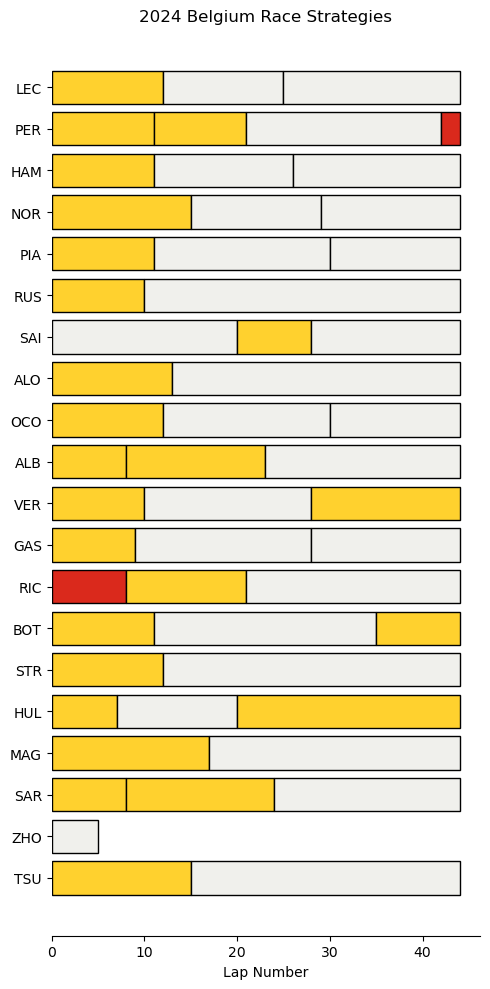

In [10]:
# Now we can plot the strategies for each driver
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

# Make the plot more readable and intuitive
plt.title("2024 Belgium Race Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

# Plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


# https://docs.fastf1.dev/examples_gallery/plot_strategy.html#sphx-glr-examples-gallery-plot-strategy-py